<center><h1>NeuroM Demo Instructions</h1></center>

<h2>0. Credit</h2>
<p>If you use NeuroM for your (published) work, please add a reference to our work:

Juan Palacios, Lida Kanari, Guy Atenekeng, Liesbeth Vanherpe, Julian Shillcock, EPFL,
NeuroM -  https://github.com/BlueBrain/NeuroM.git.</p>

<h2>1. Installation</h2>
NeuroM supports Linux and OS X. Windows users are advised to use [VirtualBox](https://www.virtualbox.org/)

It is assumed that the following packages are installed on your system:

* Python 2.7
* numpy >= 1.8.0
* scipy
* h5py >= 2.2.1 
* matplotlib >= 1.3.1
* ipython
* pip
* virtualenv
* git

These are available as packages in most Linux distributions. For OS X, please refer to [MacPorts](http://www.macports.org/) if you don’t already use a different package manager.

<h3> 1.1 Virtualenv set-up </h3>

<code>
$ virtualenv --system-site-packages nrm    # creates a virtualenv called "nrm" in nrm directory
$ source nrm/bin/activate                  # activates virtualenv
(nrm)$                                     # now we are in the nrm virtualenv
</code>

The prompt indicates that the virtualenv has been activated. To de-activate it,

<code>
(nrm)$ deactivate
</code>

<h3> 1.2 Installation </h3>

(nrm)$ git clone https://github.com/BlueBrain/NeuroM.git

(nrm)$ pip install -e ./NeuroM              # the -e flag makes source changes immediately effective

<h2> 2. Basic Examples </h2>

<h3>2.1 Check the validity of a morphology file </h3>

The application "morph_check" allows you to apply semantic checks to a morphology file before loading it into NeuroM.

<code>
(nrm)$ morph_check -h                       # shows help for the script to check a morphology
</code>

Try it yourself! You can go to [NeuroMorpho](http://neuromorpho.org) to download a neuronal morphology and perform the semantic checks.

<code>
(nrm)$ morph_check  path/to/file/filename
<code>

<h3>2.2 Extract basic morphometrics of a sample morphology </h3>

Let's start by running an example of basic measurement extraction:

<code>
(nrm)$ cd NeuroM
(nrm)$ python examples/ezy.py
</code>

<h3>2.3 The neurom.ezy module</h3>

The neurom.ezy module contains a Neuron class and helper functions that allow to easily load neuron morphologies from files into NeuroM data structures. It also provides convenient methods to query various properties of the neurons.

Open the interactive python terminal:

<code>
(nrm)$ ipython –pylab
</code>

If this gives a warning "Attempting to work in a virtualenv …",  ipython can be pip-installed inside the virtualenv but this must override the system ipython:

<code>
(nrm)$ pip install -I ipython
<code>

Now you can try and use the neurom.ezy functionality! We will start by loading and visualizing neuronal morphologies. Next, we will extract basic morphometrics.

In [1]:
%matplotlib inline
# import ezy module of NeuroM
from neurom import ezy

In [2]:
# load a neuron from an swc or h5 file
neuron = ezy.load_neuron('test_data/valid_set/Neuron.swc')

(<matplotlib.figure.Figure at 0x7f69e30429d0>,
 <matplotlib.axes.AxesSubplot at 0x7f69e2b51490>)

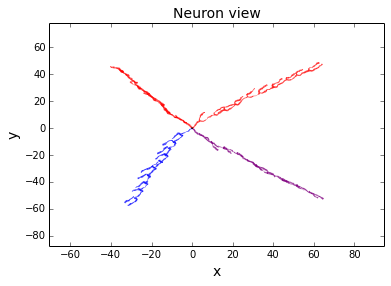

In [3]:
# visualize neuron in two dimensions
ezy.view(neuron)

(<matplotlib.figure.Figure at 0x7f69e2bd8350>,
 <matplotlib.axes.Axes3DSubplot at 0x7f6a001b1550>)

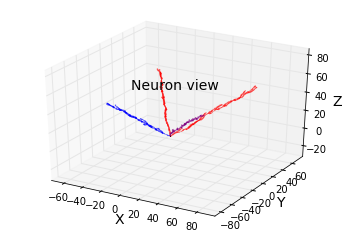

In [4]:
# in three dimensions
ezy.view3d(neuron)

<b>Feature Extraction</b>

In [5]:
# Extract the number of neurites (basal and apical dendrites, and axons)
number_of_neurites = neuron.get_n_neurites()

# Extract the number of sections
number_of_sections = neuron.get_n_sections()

# Extract soma size
soma_radius = neuron.get_soma_radius()

# Extract the number of sections per neurite
number_of_sections_per_neurite = neuron.get_n_sections_per_neurite()

# printing
print " Neuron id          : {0} \n \
Number of neurites : {1} \n \
Soma Radius        : {2:.2f} \n \
Number of sections : {4}".format(neuron.name, number_of_neurites, soma_radius, number_of_neurites, number_of_sections)

print
print "Neurite type \t\t\t| Number of sections"

for i, neurite in enumerate(neuron.neurites):
    
    print "{0:31} | {1}".format(str(neurite.type), number_of_sections_per_neurite[i])

 Neuron id          : Neuron 
 Number of neurites : 4 
 Soma Radius        : 0.17 
 Number of sections : 84

Neurite type 			| Number of sections
TreeType.axon                   | 21
TreeType.basal_dendrite         | 21
TreeType.basal_dendrite         | 21
TreeType.apical_dendrite        | 21


<b>In following block, features with list output are calculated,</b>

In [225]:
# Extract the lengths of the sections
section_lengths = neuron.get_section_lengths ()

# Extract the lengths of the segments
segment_lengths = neuron.get_segment_lengths ()

# Extract the local bifurcation angles
local_bif_angles = neuron.get_local_bifurcation_angles()

# Extract the remote bifurcation angles
remote_bif_angles = neuron.get_remote_bifurcation_angles()

# Extract the path distances of sections
section_path_distances = neuron.get_section_path_distances ()

# Extract the radial distances of sections
section_radial_distances = neuron.get_section_radial_distances ()

# printing


features = (segment_lengths, section_lengths, local_bif_angles, 
            remote_bif_angles, section_path_distances, section_radial_distances)

def check(feature_list, n): 
    return  '{0:.3f}'.format(feature_list[n]) if n < len(feature_list) else ''

print '|seg_length|sec_length|loc_bif_angles|\
rem_bif_angles|section_path_distances|section_radial_distances|'

n = 0
finished = False
while not finished:
    
    args = (check(f, n) for f in features)
    
    print '|{0:^10}|{1:^10}|{2:^14}|{3:^17}|{4:^22}|{5:^24}|'.format(*args)
    
    n += 1
    if n == 50: finished = True


|seg_length|sec_length|loc_bif_angles|remote_bif_angles|section_path_distances|section_radial_distances|
|  0.100   |  9.579   |    2.094     |      0.339      |        9.579         |         8.842          |
|  0.651   |  9.649   |    2.094     |      0.567      |        19.228        |         15.749         |
|  1.010   |  10.264  |    2.094     |      0.593      |        19.844        |         16.744         |
|  1.061   |  9.190   |    2.094     |      0.494      |        29.033        |         23.233         |
|  1.146   |  9.281   |    2.094     |      0.156      |        29.125        |         23.070         |
|  0.945   |  10.726  |    2.094     |      0.518      |        39.851        |         30.579         |
|  1.304   |  9.589   |    2.094     |      0.764      |        38.713        |         30.181         |
|  1.088   |  10.454  |    2.094     |      0.470      |        49.167        |         37.802         |
|  1.180   |  8.928   |    2.094     |      0.724      

In order to visualize the output of the features above, we will need a histogram function,

<h1>3. More Examples </h1>

<h2> 3.1 Analyze different type of trees </h2>

The previous examples treated all neurites in the same way. The ezy module allows you to extract morphometrics for a selected type of trees.

In [97]:
# Extract the section lengths of axonal trees
ax_section_lengths = neuron.get_section_lengths (neurite_type=ezy.TreeType.axon)

# Extract the section lengths of basal dendrite trees
ba_section_lengths = neuron.get_section_lengths (neurite_type=ezy.TreeType.basal_dendrite)

# Extract the section lengths of apical dendrite trees
ap_section_lengths = neuron.get_section_lengths (neurite_type=ezy.TreeType.apical_dendrite)

print 'axonal ', ax_section_lengths
print 'basal ', ba_section_lengths
print 'apical ', ap_section_lengths

axonal  [  9.57911737   9.64901212  10.26444194   9.18963499   9.28095558
  10.72637819   9.58862945  10.45414656   8.92750196  10.05466932
   9.96815205  10.72221858  10.55440382   9.11262954  10.09303133
  10.33071556   9.17709438   8.86068767  10.37491982   9.95295124
  11.01846074]
basal  [  7.97232242   8.73002814  10.71154672  10.51683552   9.63361814
  10.1348335   10.1034446   10.90464832  11.65250813  10.20352358
   9.54012263   9.53084499  10.79778536  10.25222844  11.60598013
   8.92943746   8.23366666   9.66996901  10.13395757  10.96762258
  10.89245052   8.22452877   9.59239376  11.0190682   10.25855549
  10.75631381  10.38491293  10.62047288  11.05192629  10.06943611
  10.10998146  10.55534081  10.58562592  10.74722939   8.23176374
   9.8508199    8.93049233  10.73839347   9.48292967   8.58137852
   9.0358861    8.48759244]
apical  [  9.21270799  11.05092479  11.02994892  10.7541096   10.17670693
   9.36444805  10.49054247   9.52925566   9.49194374  10.36496319
   8.42121

<h2> 3.2 Perform statistical analysis on extracted measurements </h2>

Now we are ready to extract basic statistical measurements, using common Python functions. For this, we will use [numpy](http://www.numpy.org/), which is a package for scientific computing with Python.



In [105]:
import numpy as np

# Now we can get the mean section length
mean_sl = np.mean(section_lengths)

# We can get the standard deviation of section lengths
std_sl = np.std(section_lengths)

# We can get the minimum section length
min_sl = np.min(section_lengths)

# … and the maximum section length
max_sl = np.max(section_lengths)

print 'Section Lengths stats : \n'
print '\tmean = {0:.2f} +- {1:.2f}'.format(mean_sl, std_sl)
print '\t[min, max] : [{0:.2f}, {1:.2f}]'.format(min_sl, max_sl)

Section Lengths stats : 

	mean = 10.01 +- 0.86
	[min, max] : [7.97, 11.76]


<h2> 3.3 Generate plots from the extracted morphometrics </h2>

The distribution of the extracted measurements can be plotted with [matplotlib](http://matplotlib.org/), which is a Python library for plot generation. The python module that we will use is pylab ([basic tutorial](http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut1.html)). Pylab is automatically available when using ipython --pylab. Otherwise, one has to import it explicitly and prepend the plot commands with the prefix used in the import statement.

First we will create two functions, histogram and boxplot, which can be found in the examples folder

In [169]:
from neurom.view import common

def histogram(neuron, feature, bins=25, normed=False, cumulative=False, new_fig=True, subplot=False, **kwargs):

    fig, ax = common.get_figure(new_fig=new_fig, subplot=subplot)

    # concatenate the string 'get_' with a feature to generate the respective function's name
    feature_values = getattr(neuron, 'get_' + feature)()

    # generate histogram
    ax.hist(feature_values, bins=bins, cumulative=cumulative, normed=normed)

    return common.plot_style(fig=fig, ax=ax, **kwargs)

def boxplot(neuron, feature, new_fig=True, subplot=False, **kwargs):
    
    # concatenate the string 'get_' with a feature to generate the respective function's name
    feature_values = getattr(neuron, 'get_' + feature)()

    # create figure or use the existing one
    fig, ax = common.get_figure(new_fig=new_fig, subplot=subplot)

    # boxplot function
    ax.boxplot(feature_values)
    
    return common.plot_style(fig=fig, ax=ax, **kwargs)

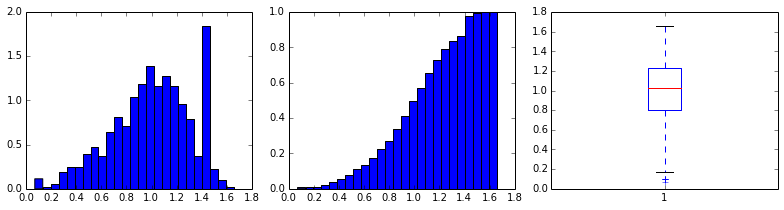

In [224]:
import pylab as plt

# select the feature of choice
feature = 'segment_lengths'

# create empty figure
plt.figure(figsize=(11,3))

# kwargs dictionary is used by plot_style to propagate the options
# in the figure. These kwargs can also be passed directly in kwargs)
xlabel = ''
ylabel = ''
title = ''

# figure is automatically used from the plot function if and only if new_fig=False
# otherwise a new figure will be created
histogram(neuron, feature, normed=True, new_fig=False, subplot=131, xlabel=xlabel, ylabel=ylabel, title=title)

# toggle cumulative=True for cumulative histogram
histogram(neuron, feature, cumulative=True, normed=True, new_fig=False, subplot=132, xlabel=xlabel, ylabel=ylabel, title=title)

# create boxplot
boxplot(neuron, feature, new_fig=False, subplot=133, xlabel=xlabel, ylabel=ylabel, title=title)

# fix layout for better visualization
plt.tight_layout()

<h2>3.4 Fit the extracted data with a statistical distribution</h2>

Now we are ready to fit the extracted data using common Python functions. For this, we will use [scipy](http://www.scipy.org/), which is a package for numerical routines for scientific computing with Python.

In [209]:
from neurom import stats

feature = 'segment_lengths'

data = getattr(neuron, 'get_' + feature)()

# Let’s start with a normal distribution. We will fit the data (here we use section_lengths) that we
# computed above with a normal distribution
p = stats.fit(data, distribution='norm')

# The output of the function is a named tuple called FitResults
print 'Fit output type : ', type(p)

# the parameters are stored in the variable params which in the case of the normal distribution
# stores the mu and sigma of the normal distribution
mu, sigma = p.params

# Print the results 
print '[mu, sigma] : [{0:.2f}, {1:.2f}]'.format(mu, sigma)

# And try to understand their meaning. Hint: check the mean and the std that we computed in 3.2
# The same process can be applied to fit different types of distributions, such as exponential,
# logarithmic and all the distributions that are available in scipy.stats.

# We need to check the statistical error of the performed fit to evaluate the accuracy of the 
# selected model. To do so we use the ‘kstest’ of scipy.stats
#distance, pvalue = stats.kstest(section_lengths, 'norm', [mu, sigma])

Fit output type :  <class 'neurom.stats.FitResults'>
[mu, sigma] : [1.00, 0.31]


Which can be visualized:

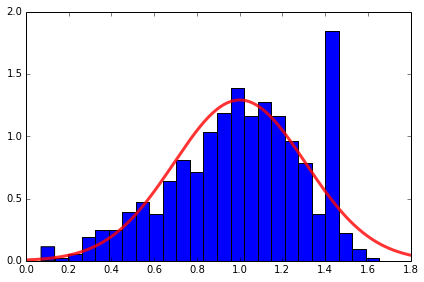

In [216]:
from scipy.stats import norm

# make a histogram as above
fig, ax = histogram(neuron, feature, new_fig=True, normed=True, xlabel='', ylabel='', title='')

# normal range 5 standard deviations aroung its mean
norm_range = np.arange(mu - 5.*sigma, mu + 5.*sigma, 0.001)

# plot the normal pdf with the given range, mu and sigma
ax.plot(rrange, norm.pdf(norm_range, mu, sigma), linewidth=3., c='r', alpha=0.8)

plt.tight_layout()

<h2>3.5 Apply more advanced manipulation on extracted data</h2>

For example extract the section lengths above a selected threshold (>10)

In [217]:
# Get the ids of section lengths above the threshold
selected_ids = np.where(section_lengths > 10)

# Get the values of section lengths above the threshold
section_lengths[selected_ids]

array([ 10.26444194,  10.72637819,  10.45414656,  10.05466932,
        10.72221858,  10.55440382,  10.09303133,  10.33071556,
        10.37491982,  11.01846074,  10.71154672,  10.51683552,
        10.1348335 ,  10.1034446 ,  10.90464832,  11.65250813,
        10.20352358,  10.79778536,  10.25222844,  11.60598013,
        10.13395757,  10.96762258,  10.89245052,  11.0190682 ,
        10.25855549,  10.75631381,  10.38491293,  10.62047288,
        11.05192629,  10.06943611,  10.10998146,  10.55534081,
        10.58562592,  10.74722939,  10.73839347,  11.05092479,
        11.02994892,  10.7541096 ,  10.17670693,  10.49054247,
        10.36496319,  10.92441795,  10.34721651,  11.75828156,
        11.56005879,  10.38431278,  10.85399109])

<h2>3.6 Combine morphometrics</h2>

We can study relations between different morphometrics. For example, we can combine section length and path length to soma,

In [219]:
# Get section length
section_lengths = neuron.get_section_lengths ()

# Get path distance to soma
section_path_distances = neuron.get_section_path_distances ()

# Get the length of all sections with a path distance between 0.0 and 60.0
section_indices = np.where((section_path_distances < 60.0) & (section_path_distances >=0.0))
selected_section_lengths = section_lengths[section_indices]